In [ ]:
!pip install pymorphy2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 8.2 MB 10.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import re
import ast

In [ ]:
import pymorphy2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
marks = '''!()—|-+-[]{}«»;?@#$<>%:'"\,./^;*_'''
tags=['<em>','</em>','<ul>','</ul>','&#39;а','&#39;a','<br>','</br>','&quot','&raquo','&laquo;']

In [ ]:
df=pd.read_csv('res.csv')

In [ ]:
df_resp=df.dropna(subset=['full_resp'])

In [ ]:
indx = pd.Index(range(0, df_resp.shape[0], 1))
df_resp = df_resp.set_index(indx)

In [ ]:
resp=df_resp['full_resp']

In [ ]:
for i in range(len(resp)):
  resp[i]= ast.literal_eval(resp[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(resp)):
  for j in  range(len(resp[i])):
      for tag in tags:
        resp[i][j]=resp[i][j].replace(tag,'')

In [ ]:
for i in range(len(resp)):
  for j in  range(len(resp[i])):
    for x in resp[i][j]:   
        if x in marks:  
            resp[i][j]=resp[i][j].replace(x,' ')
    resp[i][j]=resp[i][j].lower()

In [ ]:
big_resp=[]
for i in range(len(resp)):
  for j in range(len(resp[i])):
    big_resp.append(resp[i][j])


Попробуем лемматизировать текст и сравнить результаты в дальнейшем 

In [ ]:
def data_lemantaz(text): 
  lem_data=[]
  morph = pymorphy2.MorphAnalyzer()
  for i in range(len(text)):
      res_line =''
      line=text[i].split(' ')
      for word in line:
          if word!=' ':
            new_word=morph.parse(word)[0].normal_form
            res_line+=new_word+' '
      if len(res_line)>0:
          lem_data.append(res_line[:-1])
  return lem_data
    


In [ ]:
lem_data=data_lemantaz(big_resp)


In [ ]:
for i in range(len(lem_data)):
   if '-' in lem_data[i]:
      lem_data[i]=lem_data[i].replace('-','')
      


Давайте  посчитаем статистику слов

In [ ]:
text=' '.join(lem_data)

In [ ]:
text_tokens = nltk.word_tokenize(text)

In [ ]:
fdist =nltk.FreqDist(text_tokens)

In [ ]:
fdist=fdist.most_common(30)

In [ ]:
x=[]
y=[]
for pair in fdist:
  x.append(pair[0])
  y.append(pair[1])

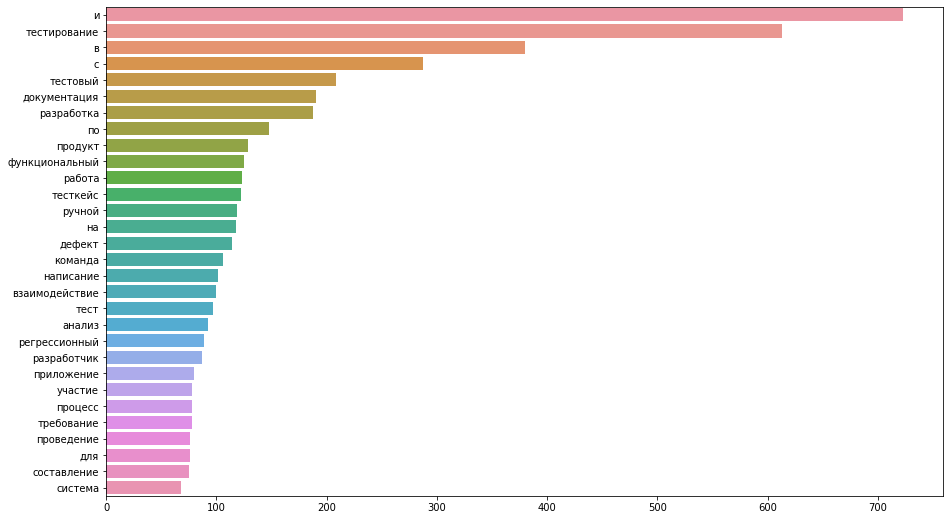

In [ ]:
plt.figure(figsize=(15, 9))
fig=sns.barplot(x=y, y=x)


In [ ]:
specific=['Определение и описание тестовых случаев, включая разработку автотестов','Проведение тестирования по разработанным тестовым случаям','Восстановление тестов после сбоев, повлекших за собой нарушение работы системы','Анализ результатов тестирования','Предоставление результатов тестирования руководителю группы (отдела) тестировщиков',
          'Оценка требований исходной документации', 'Определение требований к тестам', 'Разработка тестовых документов, включая план тестирования','Оценка тестов',
          'Выявление приоритетных функций для покрытия тестирования','Утверждение с аналитиком (и/или руководителем проекта) требований заказчика','Формирование и утверждение стратегии тестирования',
          'Организация рабочего процесса команды специалистов по тестированию (включая оценку трудозатрат)','Мониторинг работ и информирование о ходе работ заинтересованных лиц']


In [ ]:
specific_adeg=['Восстановление тестов после сбоев повлекших за собой нарушение работы системы',
               'Анализ результатов тестирования',
               'Предоставление результатов тестирования руководителю группы (отдела) тестировщиков',
               'Деятельность по обучению младших тестировщиков',
               'Разработка тестовых документов включая план тестирования',
               'Оценка тестов',
               'Подбор персонала совместно с руководителем подразделения и специалистом соответствующей службы',
               'Проведение обучения тестировщиков']

In [ ]:
def transform_specific(specific):
  for i in range(len(specific)):
      for x in specific[i]:   
          if x in marks:  
              specific[i]=specific[i].replace(x,' ')
      specific[i]=specific[i].lower()
  return specific

In [ ]:
specific=transform_specific(specific)
specific_adeg=transform_specific(specific_adeg)

In [ ]:
lem_specific=data_lemantaz(specific)

In [ ]:
lem_specific_adeg=data_lemantaz(specific_adeg)

Применение BerTopic

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.3 MB/s 
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 5.2 MB 48.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.2 MB 42.2 MB/s 
     |████████████████████████████████| 1.2 MB 44.8 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 46.0 MB/s 
     |████████████████████████████████| 636 kB 56.3 MB/s 
     |████████████████████████████████| 1.1 MB 67.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342094 sha256=9d4f84d48913e930d60058ea3635e8be0f1c49778bfecc3860748fa0d47fa95e
  Stored in directory: /root/.cache/p

In [ ]:
from bertopic import BERTopic


In [ ]:
from gensim.models import Phrases
import gensim

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Подсчет когерентности**

In [ ]:
russian_stopwords = stopwords.words("russian")
def remove_stopwords(texts):
    return [[word for word in doc if word not in russian_stopwords] for doc in texts]

In [ ]:
sentence = [doc.split() for doc in lem_data]
sentence_no=remove_stopwords(sentence)

In [ ]:
bigram = Phrases(sentence, min_count=1,threshold=0.01,  delimiter=b' ')
trigram = Phrases(bigram[sentence])
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
sentence_no=remove_stopwords(sentence)
bigramm_view=[bigram_mod[doc] for doc in sentence_no]
trigram_view=[trigram_mod[bigram_mod[doc]] for doc in sentence_no]


In [ ]:

import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
def calculuate_coherence_score(topic_model,topics1,text):  
  #variable
    

  # Extract features for Topic Coherence evaluation
  tokens =  [doc.split() for doc in text]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
               for topic in range(len(set(topics1))-1)]

  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words, 
                                  texts=tokens, 
                                  corpus=corpus,
                                  dictionary=dictionary, 
                                  coherence='c_v')
  coherence = coherence_model.get_coherence()
  return coherence

*Давайте сравним на каких данных лучше дает результат на лемматизированных или нет**

In [ ]:
topic_model_lem = BERTopic(embedding_model="sentence-transformers/LaBSE")
topic_model_not_lem = BERTopic(embedding_model="sentence-transformers/LaBSE")

In [ ]:
topics_lem, _ = topic_model_lem.fit_transform(lem_data)
topics_not_lem, _ = topic_model_not_lem.fit_transform(big_resp)

In [ ]:
topic_lem=topic_model_lem.get_topic_info()
topic_not_lem=topic_model_not_lem.get_topic_info()

In [ ]:
topic_lem

,Topic,Count,Name
0,-1,486,-1_на_тестирование_по_дефект
1,0,143,0_команда_взаимодействие_разработчик_взаимодей...
2,1,78,1_api_ui_ux_rest
3,2,68,2_мобильный_приложение_веб_ручной
4,3,63,3_требование_анализ_результат_покрытие
5,4,46,4_ручной_мануальный_автоматизированный_функционал
6,5,45,5_подготовка_данные_тестовый_документация
7,6,45,6_отчёт_результат_по_составление
8,7,40,7_проработка_участие_ci_задача
9,8,39,8_автоматизированный_автотест_автоматизация_по...


In [ ]:
topic_not_lem

,Topic,Count,Name
0,-1,513,-1_на_по_поддержка_разработка
1,0,109,0_мобильных_приложений_веб_тестирование
2,1,58,1_сред_подготовке_участвовать_процессов
3,2,52,2_документацией_данных_подготовка_документации
4,3,44,3_отчетов_результатам_результатах_тестировании
5,4,36,4_функциональности_новой_продуктов_функционала
6,5,36,5_ui_ux_api_e2e
7,6,35,6_чеклистов_тесткейсов_тестпланов_сценариев
8,7,34,7_тесткейсы_чеклисты_тестовой_документации
9,8,33,8_требований_анализ_требования_результатов


In [ ]:
coh_lem=calculuate_coherence_score(topic_model_lem,topics_lem ,lem_data)
coh_lem

0.41268947892049884

In [ ]:
coh_lem_not=calculuate_coherence_score(topic_model_not_lem,topics_not_lem, big_resp)
coh_lem_not

0.37468864087482207

Таким образом лучше использовать лемматизированные  данные 

**Посмотри какие эмбендинги дают лучше результать с помощью TF-IDF или с использованием Bert-sentence**

In [ ]:
russian_stopwords = stopwords.words("russian")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

embeddings = TfidfVectorizer(min_df=2, stop_words=russian_stopwords)
topic_model_my_vec = BERTopic(embedding_model=embeddings)
topic_my_vec,_=topic_model_my_vec.fit_transform(lem_data)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
topic_model_my_vec.get_topic_info()


,Topic,Count,Name
0,-1,517,-1_требование_анализ_тестирование_на
1,0,68,0_and_in_testing_test
2,1,63,1_команда_взаимодействие_взаимодействовать_член
3,2,47,2_регрессионный_функциональный_проведение_инте...
4,3,47,3_участвовать_продуктив_пропуск_отчёт
5,4,46,4_дефект_исправление_проверка_кроссплатформенный
6,5,41,5_api_e2e_ui_тест
7,6,39,6_качество_участие_улучшение_релиз
8,7,34,7_существующий_поддержка_работоспособность_мар...
9,8,34,8_мобильный_приложение_веб_мануальный


In [ ]:
coh_my_vec=calculuate_coherence_score(topic_model_my_vec,topic_my_vec, lem_data)
coh_my_vec

0.36713874044702566

По полученной метрики можно сказать что эмбендинги от sentence transformer немного лучше

**Посчитаем наиболее оптимальные гиперпараметры  модели**

так как  модель обучается недолго давайте  простым перебором ппройдемся по всем параметрам 

In [ ]:
n_words_in_theme=[4,5,6]
min_topic_size=[10,12,15, 20 ]
#nr_topic=["auto", 10,15,20,25]



In [ ]:
val_res={}
for i in n_words_in_theme:
     for k in min_topic_size:
         topic_model_sentens = BERTopic(embedding_model="sentence-transformers/LaBSE",min_topic_size=k,top_n_words=i)
         topics, _=topic_model_sentens.fit_transform(lem_data)
         val_res[f'{i},{k}']=calculuate_coherence_score(topic_model_sentens,topics, lem_data)


In [ ]:
val_res

{'4,10': 0.6690247758178473,
 '4,12': 0.6937829552858145,
 '4,15': 0.6737856088334552,
 '4,20': 0.485059424628995,
 '5,10': 0.6041953599520503,
 '5,12': 0.623762108323618,
 '5,15': 0.6283493933847017,
 '5,20': 0.4404548820582467,
 '6,10': 0.5393907221953336,
 '6,12': 0.5801638287220695,
 '6,15': 0.538000805743821,
 '6,20': 0.6326089107761114}

In [ ]:
topics, _ = topic_model_sentens.fit_transform(lem_data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Таким образом мы получили оптимальные гипер парамтры для модели

In [ ]:
topic_model_perfect = BERTopic(embedding_model="sentence-transformers/LaBSE",top_n_words=4,min_topic_size=12,calculate_probabilities=True)

In [ ]:
topics_perf, prob=topic_model_perfect.fit_transform(lem_data)

KeyboardInterrupt: ignored

In [ ]:
topic_model_perfect.get_topic_info()

,Topic,Count,Name
0,-1,470,-1_работа_на_разработка_по
1,0,163,0_взаимодействие_команда_разработчик_аналитик
2,1,137,1_требование_анализ_результат_отчёт
3,2,132,2_тесткейс_чеклист_тестплан_тестовый
4,3,120,3_мобильный_приложение_ручной_тестирование
5,4,117,4_дефект_документирование_отслеживание_исправл...
6,5,77,5_автотест_запуск_падение_автоматизация
7,6,76,6_api_ui_ux_rest
8,7,75,7_регрессионный_frontend_backend_тестирование
9,8,71,8_документация_тестовый_создание_поддержка


In [ ]:
topic_model_perfect.visualize_barchart()

In [ ]:
topic_model_perfect.visualize_topics()

In [ ]:
topic_model_perfect.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model_perfect.get_representative_docs()

{-1: ['обучение коллега',
  'карьерный рост',
  'перфекционист',
  'написание запрос sql ',
  'experience in sql  advertising and sdks analytics ',
  'знание sql на уровень простой запрос  агрегировать функция  джоина  как строиться связь между таблица  ',
  'работа в agile команда',
  ' работа в продуктовый команда в рамка agile процесс  в тот число работа с ошибка  ',
  'гибкий график  40 час в неделя'],
 0: ['взаимодействие с команда разработчик ',
  ' тесно взаимодействовать с команда разработка  ',
  'взаимодействие с группа разработка ',
  '  консультировать разработчик ',
  'переписка с вендор ',
  ' взаимодействие с программист  ',
  ' взаимодействие с разработчик  аналитик  ',
  'взаимодействие с разработчик  аналитик ',
  'взаимодействие с разработчик  аналитик '],
 1: [' предоставление отчётность о провести тестирование  ',
  'анализ требование на основание тз  постановка задача',
  'составление отчёт о результат провести тестирование '],
 2: ['составлять тестовый сценарий '

In [ ]:
matrix=topic_model_perfect.visualize_heatmap()

In [ ]:
matrix

In [ ]:
new_topics, new_probs = topic_model_perfect.reduce_topics(lem_data, new_topics, new_probs, nr_topics=15)

In [ ]:
coh=calculuate_coherence_score(topic_model_perfect, topics_perf,lem_data)

In [ ]:
coh

0.7848845412865323

In [ ]:
predict=topic_model_perfect.transform(lem_specific)

In [ ]:
pred_aged=topic_model_perfect.transform(lem_specific_adeg)

In [ ]:
pred_adeg=set(pred_aged[0])


In [ ]:
pred_mai=set(predict[0])

In [ ]:
def count_sim(data, topics):
  count=(len(data))/(len(set(topics))-1)
  return count*100

In [ ]:
res_mai=count_sim(pred_mai,topics_perf)
res_mai

46.666666666666664

In [ ]:
res_adeg=count_sim(pred_adeg,topics_perf)
res_adeg

26.666666666666668

In [ ]:
def sim_matrix_count(vectors1,vectors2):
  sim_matrix=np.zeros((len(vectors1), len(vectors2)))
  for i in range(len(vectors1)):
          for j in range(len(vectors2)):
            sim = spatial.distance.cosine(vectors1[i], vectors2[j])
            sim_matrix[i,j] = sim
  return sim_matrix